# Machine Learning

In [3]:
import seaborn as sns #to download iris
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [7]:
# load the iris dataset
# [n_samples, n_features] samples are rows
# X = data
# y = label

iris = sns.load_dataset("iris")
iris.head() #first 5 values

#sns.pairplot(iris, hue="species", height=2)
#plt.show()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Classification

Classification is about predicting *discrete* labels

In [27]:
X_iris = iris.drop("species", axis=1) #remove species column from this table
#X_iris.head()
#print(iris.shape)
#print(X_iris.shape)

In [28]:
# get just the labels
y = iris["species"]

# Gaussian naive bayes is a classification algorithm that uses naive bayes probabilities (supervised approach)
# given that the sepal width is this what is the probability that this flower is this species
# further assumption: we assume that the sample distribution is gaussian

# Gaussian NB is a classifying algorithm

# create an instance of the model
model = GaussianNB()

# train the model
model.fit(X_iris, y)

# for unsupervised
# model.fit_predict(data)

# scikit learn only works on cpu, not GPU

# check if model works, test model
y_predict = model.predict(X_iris)

# find accuracy of model
accuracy = accuracy_score(y, y_predict)
accuracy

# BAD MISTAKE: test set = data set

0.96

In [27]:
from sklearn.model_selection import train_test_split

In [299]:
## get just the labels
y = iris["species"]

# create the training and testing datasets
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y, train_size=0.5) #split half of datasize, random_state is like seed

# create an instance of the model
model = GaussianNB()

# train the model
model.fit(Xtrain, ytrain)

# check if model works, test model
y_predict = model.predict(Xtest)

# find accuracy of model
accuracy = accuracy_score(ytest, y_predict)
accuracy

# usually good splits are 70 for training and 30% for test set

0.9733333333333334

In [301]:
''' CURIOSITY: Federated learning
Keep the data somewhere else (hospital) and train model on your machine (at the lab)
Instead of having a single model, have several models (main model)
The hospital sends just the features from their local models to your main model 
so you cannot reconstruct the original data of features '''

' CURIOSITY: Federated learning\nKeep the data somewhere else (hospital) and train model on your machine (at the lab)\nInstead of having a single model, have several models (main model)\nThe hospital sends just the features from their local models to your main model \nso you cannot reconstruct the original data of features '

## Regression

Regression is about prediciting *continuous* outcomes.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

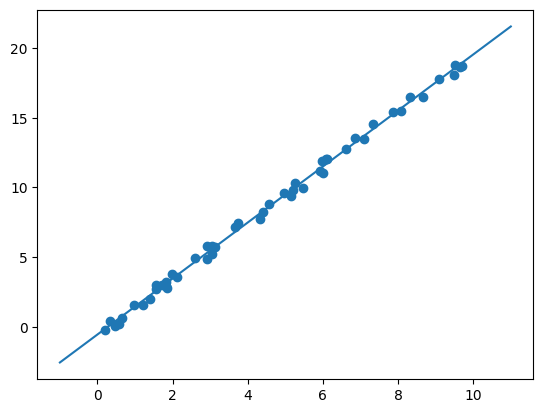

In [26]:
# fixing the seed for the random generator
rng = np.random.RandomState(42)

x = 10 * rng.rand(50)
y = 2*x - 1 + rng.rand(50)

#plt.scatter(x,y)
#plt.show()

# create an instance of the model
model = LinearRegression(fit_intercept=True) #fit intercept true mean to consider the intercept c != 0. 

# prepare the data by adding a new dimension in order to have a 2d matrix! IMPORTANT: data should be a matrix!
X = x[:, np.newaxis]
# train the model
model.fit(X,y)

# create test data
xtest = np.linspace(-1, 11)
Xtest = xtest[:, None] #np.newaxis 

# test model
y_predictions = model.predict(Xtest)

plt.scatter(x,y)
plt.plot(xtest, y_predictions)
plt.show()

## Unsupervised Learning

### Clustering with K-means

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


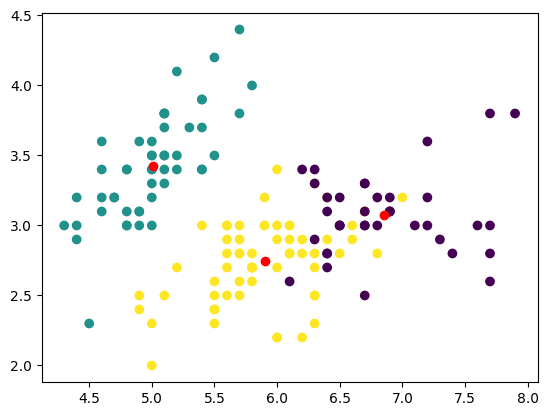

[6.85      5.006     5.9016129]


In [21]:
iris = sns.load_dataset("iris")

X_iris = iris.drop("species", axis=1) #remove label from data
y_iris = iris["species"]

model = KMeans(n_clusters=3)
#db scan is an algorithm to help find K

model.fit(X_iris)
y_predict = model.predict(X_iris)

plt.scatter(X_iris["sepal_length"], X_iris["sepal_width"], c=y_predict) #pick as x,y coordinates any features you want (x, y, color)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c="red") #a list containing 3 tuples with x,y coordinates of the centroids
plt.show()

print(model.cluster_centers_[:,0]) #centers for the 3 centroids of sepal length



### Color quantization 

In [1]:
"""Program that uses unsupervised machine learning for reducing the number of colors of an image"""
import numpy as np
import cv2 
from sklearn.cluster import KMeans

#since opencv images are numpy arrays and scikilit learn knows how to handle numpy arrays


# load the image
img_arr = cv2.imread('C:/Users/USER/Desktop/AI Lab/Data/01-Data/lena.png') 
print(img_arr.shape) #our image is a cube, but sciklit learn accepts only a 2D matrix

# prepare the image for sklearn
(h,w,c) = img_arr.shape  #we need this to reshape our final image

img2D = img_arr.reshape(h*w, c)

# train and use the model
kmeans_model = KMeans(n_clusters=8)
cluster_label = kmeans_model.fit_predict(img2D) #it does the fit and then predicts!

# convert the centroids coordinates to int, since they are float
rgb_cols = kmeans_model.cluster_centers_.round(0).astype(int) #round(0) does flooring


# reconstruct the original image
img_quant = np.reshape(rgb_cols[cluster_label], (h,w,c))
img_quant = img_quant.astype("uint8") #just to be sure!

cv2.imshow("Img", img_quant)
cv2.waitKey(0)
cv2.destroyAllWindows()


(512, 512, 3)


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### Clustering with GMM

In [32]:
from sklearn.mixture import GaussianMixture

In [33]:
model = GaussianMixture(n_components=3, covariance_type="full")

In [41]:
model.fit(X_iris) #fit to data, no label
y_gmm = model.predict(X_iris) #predicts cluster label

iris["cluster"] = y_gmm #add column named cluster to data table

sns.lmplot("PCA1", "PCA2", data=iris, hue='species', col='cluster', fit_reg=False)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


TypeError: lmplot() got multiple values for argument 'data'

### Handwritten supervised classification

(1797, 8, 8)
0.8833333333333333


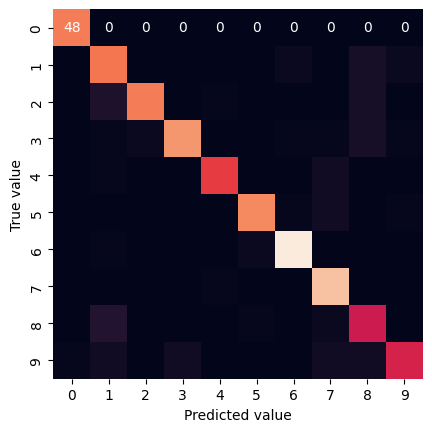

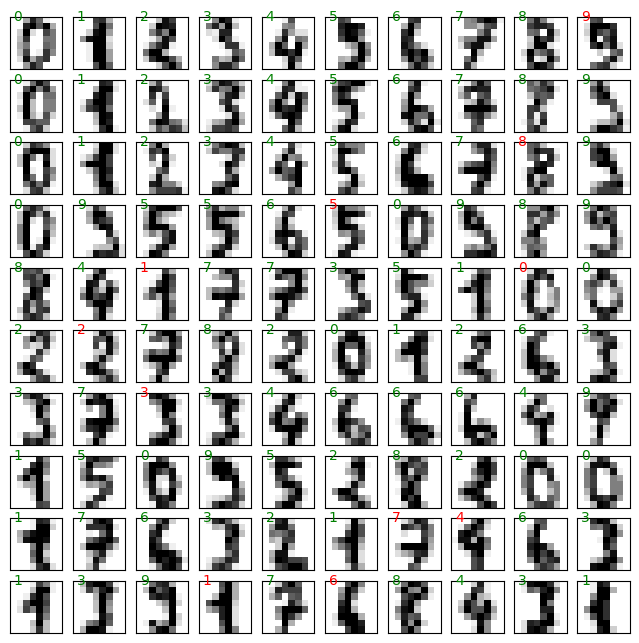

In [1]:
'''Handwritten supervised classification'''

from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import  seaborn as sns
from sklearn.metrics import confusion_matrix # girlll

# load the dataset
digits = load_digits()

print(digits.images.shape)
# output: (1797, 8, 8) because it's greyscale
# if the images were in color it would be: (1797, 8, 8, 3)

'''
# plot some elements of the dataset
# 10x10 grid
fig, axes = plt.subplots(10, 10, figsize=(8,8), subplot_kw={'xticks':[], 'yticks':[]})

for i, ax in enumerate(axes.flat): #loop over the elements in the grid (for each subplot)
    ax.imshow(digits.images[i], cmap='binary')  #use binary coloring as the digits are written over a white background
    ax.text(0.05, 0.05, str(digits.target[i]), color='green') # (position to place the text, string to print, color) .target contains the label

plt.show()
'''


# [n_samples, n_features]
X = digits.data  # -> get the same data but with a diff shape (monodimensional)
# X contains only the samples and the corresponding features
#print(X.shape) 
y = digits.target
# y is a monodimentional array too

# split the data into training and testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.7)

# define the model
model = GaussianNB()

# train the model
model.fit(Xtrain, ytrain)

# use the model for predicting new data
y_predictions = model.predict(Xtest)

# compute the accuracy score
accuracy = accuracy_score(ytest, y_predictions)
print(accuracy)

# compute the confusion matrix
mat = confusion_matrix(ytest, y_predictions)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.show()

fig, axes = plt.subplots(10, 10, figsize=(8,8), subplot_kw={'xticks':[], 'yticks':[]})

for i, ax in enumerate(axes.flat): #loop over the elements in the grid (for each subplot)
    ax.imshow(digits.images[i], cmap='binary')  #use binary coloring as the digits are written over a white background
    ax.text(0.05, 0.05, str(digits.target[i]), color='green'if(ytest[i]==y_predictions[i])else'red') # (position to place the text, string to print, color) .target contains the label

plt.show()
